# Phase unwrapping

In this tutorial, we demostrate how to unwrap the interferograms on refined measurement points (PS+DS).

In [ ]:
import moraine.cli as mc
import moraine as mr
import zarr
import numpy as np
import toml

In [ ]:
logger = mc.get_logger()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
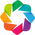

In [ ]:
import holoviews as hv
hv.extension('bokeh')
from bokeh.models import WheelZoomTool
from holoviews import opts
hv.output(widget_location='bottom')

In [ ]:
!mkdir phase_unwrapping -p

In [ ]:
pc_ph = './pixel_refinement/hix/pc/pc_ph.zarr'
pc_e = './pixel_refinement/hix/pc/pc_e.zarr/'
pc_n = './pixel_refinement/hix/pc/pc_n.zarr/'

pc_unw = './phase_unwrapping/pc_unw.zarr'
pc_ph_zarr = zarr.open(pc_ph,mode='r')
tnet = mr.TempNet.from_bandwidth(pc_ph_zarr.shape[1],bandwidth=1)

In [ ]:
mc.gamma_mcf_pt(pc_e, pc_n, pc_ph, pc_unw, tnet.image_pairs)

2025-11-02 17:19:05 - log_args - INFO - running function: gamma_mcf_pt
2025-11-02 17:19:05 - log_args - INFO - fetching args:
2025-11-02 17:19:05 - log_args - INFO - pc_x = './pixel_refinement/hix/pc/pc_e.zarr/'
2025-11-02 17:19:05 - log_args - INFO - pc_y = './pixel_refinement/hix/pc/pc_n.zarr/'
2025-11-02 17:19:05 - log_args - INFO - ph = './pixel_refinement/hix/pc/pc_ph.zarr'
2025-11-02 17:19:05 - log_args - INFO - unw_ph = './phase_unwrapping/pc_unw.zarr'
2025-11-02 17:19:05 - log_args - INFO - image_pairs = array([[ 0,  1],
       [ 1,  2],
       [ 2,  3],
       [ 3,  4],
       [ 4,  5],
       [ 5,  6],
       [ 6,  7],
       [ 7,  8],
       [ 8,  9],
       [ 9, 10],
       [10, 11],
       [11, 12],
       [12, 13],
       [13, 14],
       [14, 15],
       [15, 16]], dtype=int32)
2025-11-02 17:19:05 - log_args - INFO - ref_point = 1
2025-11-02 17:19:05 - log_args - INFO - out_chunks = None
2025-11-02 17:19:05 - log_args - INFO - n_workers = 1
2025-11-02 17:19:05 - log_args

2025-11-02 17:19:14,156 - distributed.worker - ERROR - Failed to communicate with scheduler during heartbeat.
Traceback (most recent call last):
  File "/users/kangl/miniforge3/envs/work2/lib/python3.12/site-packages/distributed/comm/tcp.py", line 226, in read
    frames_nosplit_nbytes_bin = await stream.read_bytes(fmt_size)
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
tornado.iostream.StreamClosedError: Stream is closed

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/users/kangl/miniforge3/envs/work2/lib/python3.12/site-packages/distributed/worker.py", line 1267, in heartbeat
    response = await retry_operation(
               ^^^^^^^^^^^^^^^^^^^^^^
  File "/users/kangl/miniforge3/envs/work2/lib/python3.12/site-packages/distributed/utils_comm.py", line 416, in retry_operation
    return await retry(
           ^^^^^^^^^^^^
  File "/users/kangl/miniforge3/envs/work2/lib/python3.12/site-packages/dis

2025-11-02 17:19:14 - gamma_mcf_pt - INFO - dask cluster closed.


In [ ]:
mc.pc_pyramid(
    './phase_unwrapping/pc_unw.zarr',
    './phase_unwrapping/pc_unw_geo_pyramid',
    x = pc_e,
    y = pc_n,
    ras_resolution=20,
)

2025-11-02 17:19:17 - log_args - INFO - running function: pc_pyramid
2025-11-02 17:19:17 - log_args - INFO - fetching args:
2025-11-02 17:19:17 - log_args - INFO - pc = './phase_unwrapping/pc_unw.zarr'
2025-11-02 17:19:17 - log_args - INFO - out_dir = './phase_unwrapping/pc_unw_geo_pyramid'
2025-11-02 17:19:17 - log_args - INFO - x = './pixel_refinement/hix/pc/pc_e.zarr/'
2025-11-02 17:19:17 - log_args - INFO - y = './pixel_refinement/hix/pc/pc_n.zarr/'
2025-11-02 17:19:17 - log_args - INFO - yx = None
2025-11-02 17:19:17 - log_args - INFO - ras_resolution = 20
2025-11-02 17:19:17 - log_args - INFO - ras_chunks = (256, 256)
2025-11-02 17:19:17 - log_args - INFO - pc_chunks = 65536
2025-11-02 17:19:17 - log_args - INFO - processes = False
2025-11-02 17:19:17 - log_args - INFO - n_workers = 1
2025-11-02 17:19:17 - log_args - INFO - threads_per_worker = 2
2025-11-02 17:19:17 - log_args - INFO - dask_cluster_arg = {}
2025-11-02 17:19:17 - log_args - INFO - fetching args done.
2025-11-02 17

In [ ]:
with open('./load_data/meta.toml','r') as f:
    dates = toml.load(f)['dates']
pc_geo_intf_plot = mc.pc_plot('./pixel_refinement/hix/pc/pc_ph_pyramid',post_proc_ras='intf_seq', post_proc_pc='intf_seq',level_increase=0)
pc_geo_intf_plot = pc_geo_intf_plot[0]*pc_geo_intf_plot[1]
pc_geo_intf_plot = pc_geo_intf_plot.redim(
    i=hv.Dimension('i', label='Intf index', range=(0,len(dates)-2), value_format=(lambda i: dates[i]+'_'+dates[i+1])),
    x=hv.Dimension('lon', label='Longitude'),
    y=hv.Dimension('lat',label='Latitude'),
    z=hv.Dimension('Wrapped Phase',range=(-np.pi,np.pi))
)
pc_geo_intf_plot = pc_geo_intf_plot.opts(
    hv.opts.Image(
        cmap='colorwheel',frame_width=500, frame_height=400, colorbar=True,
        default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],
        active_tools=['wheel_zoom'],
        title="Wrapped Phase",
    ),
    hv.opts.Points(
        color='Wrapped Phase', cmap='colorwheel',frame_width=500, frame_height=400, colorbar=True,
        default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],
        active_tools=['wheel_zoom'],
        title="Wrapped Phase",
    ),
)

pc_geo_unw_plot = mc.pc_plot('./phase_unwrapping/pc_unw_geo_pyramid',level_increase=0)
pc_geo_unw_plot = pc_geo_unw_plot[0]*pc_geo_unw_plot[1]
pc_geo_unw_plot = pc_geo_unw_plot.redim(
    i=hv.Dimension('i', label='Intf index', range=(0,len(dates)-2), value_format=(lambda i: dates[i]+'_'+dates[i+1])),
    x=hv.Dimension('lon', label='Longitude'),
    y=hv.Dimension('lat',label='Latitude'),
    z=hv.Dimension('Unwrapped Phase',range=(-10,10))
)
pc_geo_unw_plot = pc_geo_unw_plot.opts(
    hv.opts.Image(
        cmap='colorwheel',frame_width=500, frame_height=400, colorbar=True,
        default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],
        active_tools=['wheel_zoom'],
        #title="Unwrapped Phase",
    ),
    hv.opts.Points(
        color='Unwrapped Phase', cmap='colorwheel',frame_width=500, frame_height=400, colorbar=True,
        default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],
        active_tools=['wheel_zoom'],
        #title="Unwrapped Phase",
    ),
)

In [ ]:
hv.element.tiles.EsriImagery()*(pc_geo_intf_plot+pc_geo_unw_plot)

:Layout
   .DynamicMap.I  :DynamicMap   [i]
      :Overlay
         .Tiles.I  :Tiles   [x,y]
         .Image.I  :Image   [lon,lat]   (Wrapped Phase,idx)
         .Points.I :Points   [lon,lat]   (Wrapped Phase,idx)
   .DynamicMap.II :DynamicMap   [i]
      :Overlay
         .Tiles.I  :Tiles   [x,y]
         .Image.I  :Image   [lon,lat]   (Unwrapped Phase,idx)
         .Points.I :Points   [lon,lat]   (Unwrapped Phase,idx)